# The Titanic Dataset (鐵達尼號資料集)

In [1]:
import pandas as pd
df = pd.read_excel("titanic3.xls", "titanic3") # excel檔案中的某個分頁
df.head() #檢視前5筆資料 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

# Jask Dawson 與 Rose DeWitt Bukater 是否有登船？

In [3]:
# contains()：找到符合子字串的列
df[df["name"].str.contains("Jack")] # 沒有Jack

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,NaN,NaN,"Philadelphia, PA"


In [4]:
df[df["name"].str.contains("Rose")] # 也沒有Rose

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
242,1,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C,11,NaN,"Paris, France"
243,1,0,"Rosenshine, Mr. George (""Mr George Thorne"")",male,46.0,0,0,PC 17585,79.2000,NaN,C,NaN,16.0,"New York, NY"
612,3,1,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,13,NaN,"London, England Norfolk, VA"


# 乘客的社會經濟地位分佈為何？

In [5]:
df.describe() # 從 pclass欄位的平均數2.29以及中位數(50%)是3，推論大部分人是中下階層

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


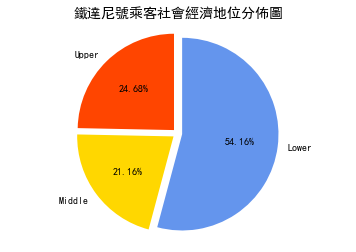

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

num = [len(df[df.pclass ==1]), len(df[df.pclass ==2]), len(df[df.pclass ==3])]
# 社會經濟地位上、中、下的乘客人數
tag = 'Upper', 'Middle', 'Lower'
c = ["orangered", "gold", "cornflowerblue"]
e = (0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(num, explode=e, labels=tag, colors=c, autopct='%1.2f%%', startangle=90) 
ax1.axis('equal')
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.title("鐵達尼號乘客社會經濟地位分佈圖", size=14)
plt.show()


# 不同性別的乘客，存活狀況為何？

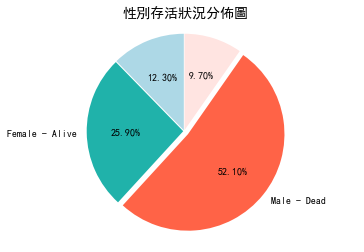

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = np.array([1, 2])

male, female = df[df.sex =="male"], df[df.sex=="female"]
alive = [len(male[male.survived==1]), len(female[female.survived==1])] # 存活人數
dead = [len(male[male.survived==0]), len(female[female.survived==0])] # 死亡人數

num = alive + dead
tag = "", "Female - Alive", "Male - Dead", ""
c = ["lightblue", "lightseagreen", "tomato", "mistyrose"]
e = (0.01, 0.01, 0.05, 0.01)

fig1, ax1 = plt.subplots()
ax1.pie(num, explode=e, labels=tag, colors=c, autopct='%1.2f%%', startangle=90) 
ax1.axis('equal')
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.title("性別存活狀況分佈圖", size=14)

plt.show()

# 不同社會經濟狀況的乘客，存活狀況為何？

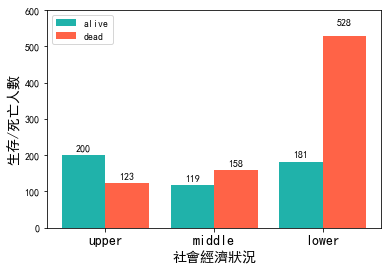

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

u, m, l = df[df.pclass == 1], df[df.pclass ==2], df[df.pclass ==3]
alive = [len(u[u.survived==1]), len(m[m.survived==1]), len(l[l.survived==1])] # 存活人數
dead = [len(u[u.survived==0]), len(m[m.survived==0]), len(l[l.survived==0])] # 死亡人數

x = np.array([1, 2, 3])
alive_bar = plt.bar(x-0.2, alive, width=0.4, color="lightseagreen")
dead_bar = plt.bar(x+0.2, dead, width=0.4, color="tomato")
plt.rcParams["font.sans-serif"]=["SimHei"]
labels = ["upper", "middle", "lower"]
plt.xticks(x, labels, size=14)
plt.xlabel("社會經濟狀況", size=14)
plt.ylim(ymax=600)
plt.ylabel("生存/死亡人數", size=14)
plt.legend((alive_bar[0], dead_bar[0]), ('alive', 'dead'), loc="best")

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                 '%d'% int(height), ha='center', va='bottom')
        
autolabel(alive_bar)
autolabel(dead_bar)

plt.show()


# 不同登船港口的乘客，存活狀況為何？

In [9]:
pt = pd.pivot_table(df, values="sex", index=["embarked"],
                    columns=["survived"], aggfunc=np.size) 
# 用 numpy.size 計算值的個數
pt

survived,0,1
embarked,,
C,120,150
Q,79,44
S,610,304


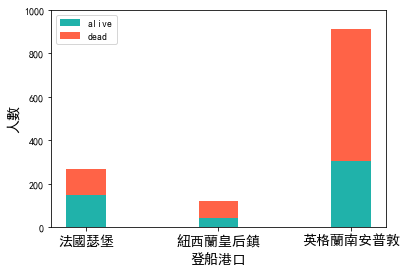

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3])
plt.bar(x, pt.loc[:,1], color="lightseagreen", width=0.3)
plt.bar(x, pt.loc[:,0], color="tomato", width=0.3, bottom = pt.loc[:,1])

plt.rcParams["font.sans-serif"]=["SimHei"]
labels = ["法國瑟堡", "紐西蘭皇后鎮", "英格蘭南安普敦"]
plt.xticks(x, labels, size=14)
plt.xlabel("登船港口", size=14)
plt.ylim(ymax=1000)
plt.ylabel("人數", size=14)
plt.legend((alive_bar[0], dead_bar[0]), ('alive', 'dead'), loc="best")

plt.show()
